<a href="https://colab.research.google.com/github/Saldarriaga0896/ME03_G13_1036668535_1037651080/blob/main/ME03_G13_%5B1036668535%5D_%5B1037651080%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Saldarriaga0896/ME03_G13_1036668535_1037651080.git

In [ ]:
!pip install -r /content/ME03_G13_1036668535_1037651080/requirements.txt

In [2]:
import pandas as pd
import json
import sys
from ME03_G13_1036668535_1037651080.src.PreprocessingModule import DataPreprocessor

In [3]:
def load_params(config_file):
  with open(config_file, 'r') as f:
      config = json.load(f)
  return config

In [4]:
config_file = '/content/ME03_G13_1036668535_1037651080/config.json'
config = load_params(config_file)
function = config.get("function")
model_type = config.get("model_type")
target_column = config.get("target_column")

path_transforms = '/content/ME03_G13_1036668535_1037651080/data/' +config.get('project_name')
path_predict = '/content/ME03_G13_1036668535_1037651080/data/predict_' + config.get('project_name')

#---------------------------------------------------------------#
#---------------------- Cargar instancias ----------------------#
#---------------------------------------------------------------#
preprocessor = DataPreprocessor(config)

------- Preprocesamiento de los datos -------------
---------------------------------------------------
--------------- Carga de datos -------------------
---------------------------------------------------
Cantidad de registros cargados:  45211
Cantidad de columnas cargadas:  17
Eliminar conlumnas indicadas por el usuario:  []
Eliminar conlumnas con valores unicos, todos los valores diferentes y duplicados: 
Cantidad de datos nuevos  (45211, 17)
 Información de los datos: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45209 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45209 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact

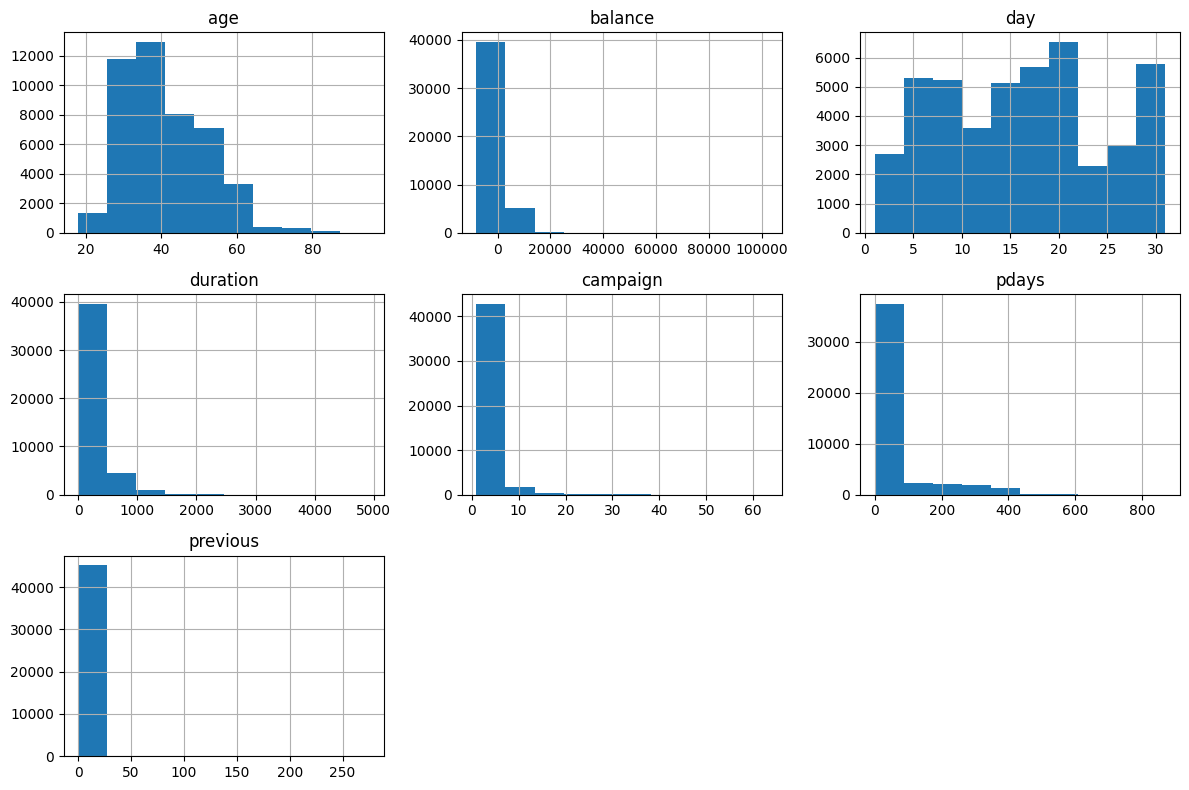

Análisis descriptivo de variables categóricas: 
                job  marital  education default housing   loan   contact  \
count         45211    45209      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27212      23202   44396   25130  37967     29285   

        month poutcome  
count   45211    45211  
unique     12        4  
top       may  unknown  
freq    13766    36959  
Visualización de variables categóricas:


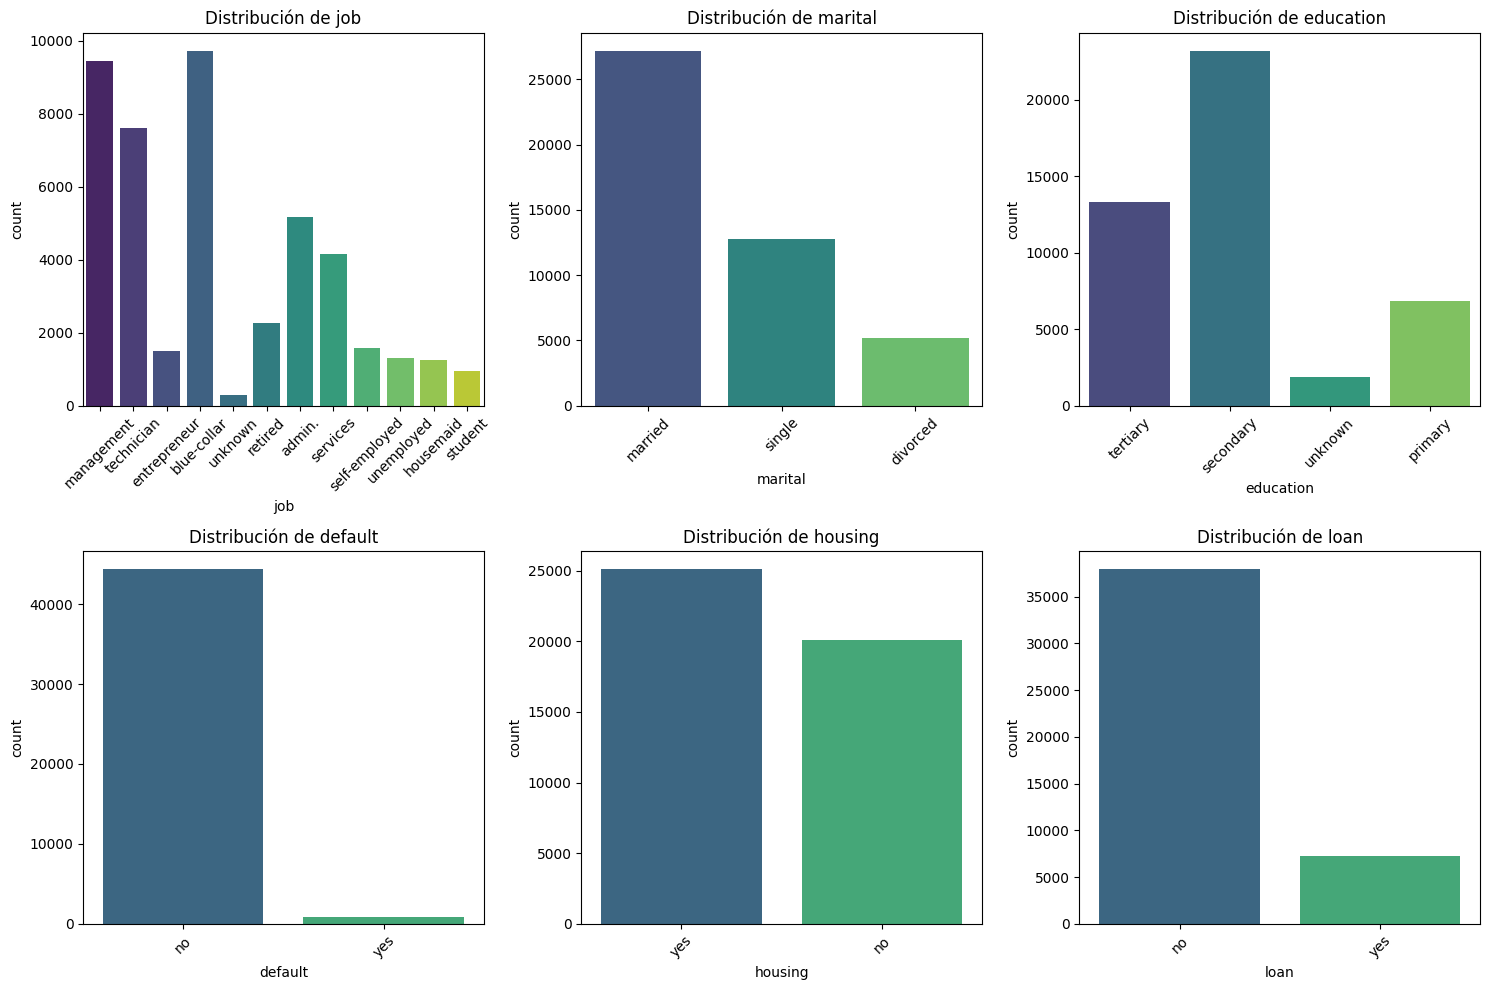

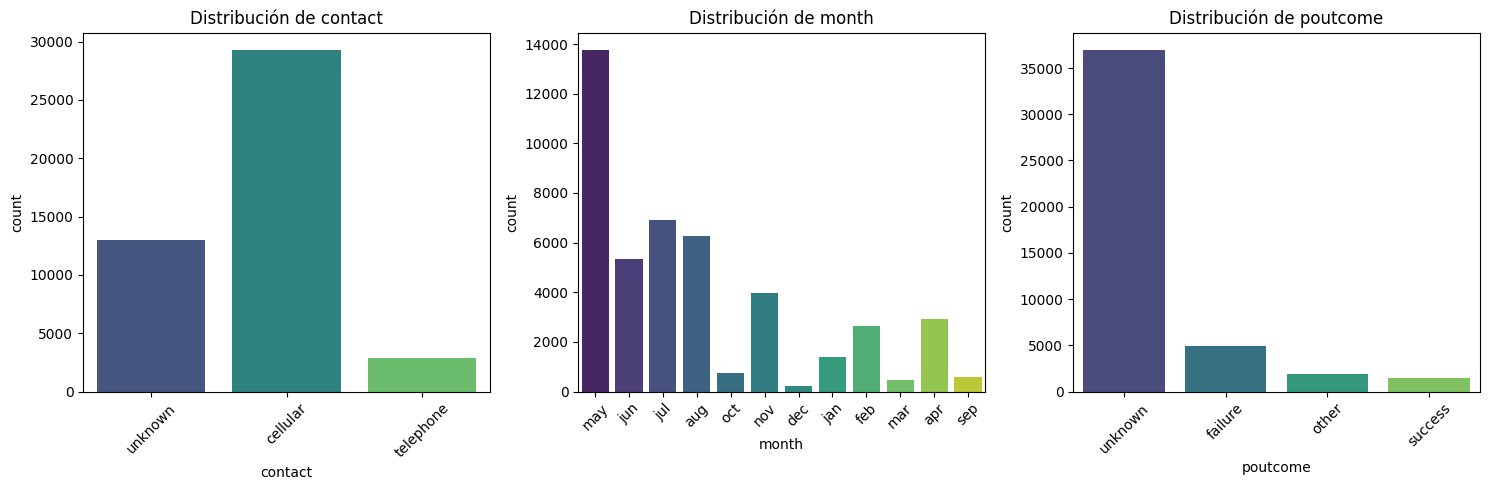

Separación de datos para predecir: 
Datos para predicciones guardados en '/content/ME03_G13_1036668535_1037651080/data/predict_prueba'
Eliminar valores atipicos
Cantidad de datos nuevos  (40555, 16) (40555,)
---------------------------------------------------
------------ Creando transformadores  -------------
---------------------------------------------------
Imputar datos numéricos.
Se imputaron las siguientes columnas: 
['age']
Imputar datos categóricos.
Se imputaron las siguientes columnas: 
['marital']
Escalar datos numéricas.
Codificar datos categóricos.
---------------------------------------------------
---------- Aplicando transformadores  -------------
---------------------------------------------------
Imputar datos nulos.
Escalar datos numéricos.
Codificar datos categóricos.
Codificación de variable a predecir.
Etiquetas codificadas: 0        0
1        0
2        0
3        0
4        0
        ..
40550    1
40551    1
40552    1
40553    1
40554    0
Length: 40555, dtype

In [6]:
print("------- Preprocesamiento de los datos -------------")

# Carga del dataset y configuraciones
preprocessor.load_dataset()
# Descripción de los datos
preprocessor.descriptive_analysis()

# Guardar un porcentaje de datos para predicciones
preprocessor.split_data_for_predictions(path_predict)
# Eliminar datos atipicos de las variables numericas
preprocessor.remove_outliers_zscore()
# Ajustar el preprocesador a los datos
preprocessor.fit()
# Transformar los datos de entrenamiento
preprocessor.transform()
# Seleccion de caracteristicas representativas
preprocessor.select_features()
# Guardar transformadores
preprocessor.save_transformers(path_transforms)

# Obtener las variables predictoras X y a predecir y procesadas.
X,y = preprocessor.get_processed_dataframe()